# Informações

- nomes: Raphael Leite da Costa Nascimento e Adriel Dos Sandos Araujo Cabral
- matrículas: 20190038319 e 20190034839
- Disciplina: Visualização de Dados

# Importações

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import squarify

In [2]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

book_colors = {
    'my_blue':'#1e83af',
    'my_red': '#9c1416',
    'my_green': '#1a7512',
    'cinza': '#ABA7A8',
    'rosa_escuro': '#CC527A',
    'rosa': '#E8175D',
    'preto_claro': '#474747',
    'preto': '#363636',
}

font = {
    'family': 'serif',
    'color':  book_colors['preto'],
    'weight': 'normal',
    'size': 16,
}

/tmp/ipykernel_39265/3210386582.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1200x800 with 0 Axes>

# Montando o data frame princial

In [3]:
data_path = 'dados'
files = [os.path.join(data_path, file) for file in os.listdir(data_path)]
files

['dados/datatran2021.csv',
 'dados/datatran2009.csv',
 'dados/datatran2007.csv',
 'dados/datatran2017.csv',
 'dados/datatran2013.csv',
 'dados/datatran2008.csv',
 'dados/datatran2012.csv',
 'dados/datatran2015.csv',
 'dados/datatran2016.csv',
 'dados/datatran2010.csv',
 'dados/datatran2019.csv',
 'dados/datatran2020.csv',
 'dados/datatran2011.csv',
 'dados/datatran2018.csv',
 'dados/datatran2014.csv',
 'dados/datatran2022.csv']

Criando uma lista de data frames e depois unindo todos em um so

In [4]:
dataframes = []

for file in files:
    dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1', low_memory=False))

df_final = pd.concat(dataframes, axis=0)
df_final['count'] = 1

In [5]:
print(len(df_final))

1981317


# Tratando os valores nulos 

Substituindo os valores nulos da coluna 'ano' pelo ano da coluna 'data_inversa'

In [6]:
def get_ano(year):
    
    regex1 = r'([0-9]+)(-[0-9]+)(-[0-9]+)'
    regex2 = r'([0-9])+/([0-9])+/([0-9]+)'
    
    if '-' in year:
        return str(re.search(regex1, year).group(1))
    else:
        return str('20' + re.search(regex2, year).group(3))

In [7]:
df_final.loc[df_final['ano'].isnull(), 'ano'] = df_final.loc[df_final['ano'].isnull(), 'data_inversa'].apply(get_ano)
df_final = df_final.astype({'ano': str})
df_final['ano'] = df_final['ano'].apply(lambda ano: ano.split('.')[0], 1)

In [8]:
df_final['ano'].unique()

array(['2021', '2009', '2007', '2017', '2013', '2008', '2012', '2015',
       '2016', '2010', '2019', '2020', '2011', '2018', '2014', '2022'],
      dtype=object)

In [9]:
df_final[['ano']].isnull().sum()

ano    0
dtype: int64

In [10]:
df_final.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'ano', 'count'],
      dtype='object')

In [11]:
df_final['km']

0          453
1          937
2        128,5
3           18
4          252
         ...  
64542      313
64543       17
64544      459
64545        5
64546     11,8
Name: km, Length: 1981317, dtype: object

In [12]:
def gerar_periodo(tempo):

    hora = int(tempo.split(':')[0])

    if 6 > hora >= 0:
        return 'madrugada'

    elif 12 > hora >= 6:
        return 'manhã'

    elif 18 > hora >=12:
        return 'tarde'

    return 'noite'
    

In [13]:
df_final['periodo'] = df_final['horario'].apply(gerar_periodo)

In [14]:
df_final['periodo']

0        madrugada
1            manhã
2            manhã
3            tarde
4            tarde
           ...    
64542        noite
64543    madrugada
64544        noite
64545        manhã
64546        noite
Name: periodo, Length: 1981317, dtype: object

In [15]:
df_final['br'].value_counts()

br
101.0    260155
116.0    250255
381.0     87963
116       83058
101       79127
          ...  
37            1
591           1
380           1
648           1
342.0         1
Name: count, Length: 330, dtype: int64

In [16]:
df_final['condicao_metereologica'] = df_final['condicao_metereologica'].str.lower()
df_final.loc[df_final['condicao_metereologica'].isin(['ceu claro', 'céu claro']), 'condicao_metereologica'] = 'sol'
df_final.loc[df_final['condicao_metereologica'] == 'ignorado', 'condicao_metereologica'] = 'ignorada'
df_final['tipo_acidente'] = df_final['tipo_acidente'].str.lower()

In [17]:
df_final.loc[df_final['tipo_acidente'].isin(['atropelamento de pedestre']), 'tipo_acidente'] = 'atropelamento de pessoa'
df_final.loc[df_final['tipo_acidente'].isin(['colisão com objeto em movimento']), 'tipo_acidente'] = 'colisão com objeto móvel'
df_final.loc[df_final['tipo_acidente'].isin(['colisão lateral sentido oposto',
                                            'colisão lateral mesmo sentido']), 'tipo_acidente'] = 'colisão lateral'

df_final.loc[df_final['tipo_acidente'].isin(['saída de leito carroçável']), 'tipo_acidente'] = 'saída de pista'

In [18]:
df_final['tipo_acidente'].value_counts()

tipo_acidente
colisão traseira                              512175
colisão lateral                               304605
saída de pista                                301881
colisão transversal                           207964
tombamento                                     96970
colisão com objeto fixo                        94208
capotamento                                    92211
colisão frontal                                85657
atropelamento de pessoa                        63132
queda de motocicleta / bicicleta / veículo     52459
atropelamento de animal                        43913
colisão com objeto estático                    21743
colisão com bicicleta                          18548
queda de ocupante de veículo                   18115
colisão com objeto móvel                       16511
incêndio                                       14212
danos eventuais                                10679
derramamento de carga                           9903
colisão com objeto              

In [19]:
teste = df_final.loc[((df_final['condicao_metereologica'].isin(['sol', 'nublado', 'chuva', 'nevoeiro/neblina']))
                      & (df_final['tipo_acidente'].isin(['colisão traseira', 'colisão lateral', 'saída de pista', 'colisão transversal', 
                        'colisão frontal']))
                      & (df_final['mortos'] > 0))]\
.groupby(['condicao_metereologica', 'tipo_acidente'])['count'].sum().reset_index()

In [20]:
teste

,condicao_metereologica,tipo_acidente,count
0,chuva,colisão frontal,3695
1,chuva,colisão lateral,760
2,chuva,colisão transversal,869
3,chuva,colisão traseira,708
4,chuva,saída de pista,1562
5,nevoeiro/neblina,colisão frontal,401
6,nevoeiro/neblina,colisão lateral,73
7,nevoeiro/neblina,colisão transversal,86
8,nevoeiro/neblina,colisão traseira,142
9,nevoeiro/neblina,saída de pista,136


In [21]:
df_final.loc[((df_final['tipo_acidente'].isin(['colisão traseira', 'colisão lateral', 'saída de pista', 'colisão transversal', 'colisão frontal']))
             & (df_final['mortos'] > 0))]\
.groupby(['tipo_acidente'])['count'].sum().reset_index()

,tipo_acidente,count
0,colisão frontal,23337
1,colisão lateral,6291
2,colisão transversal,7808
3,colisão traseira,8420
4,saída de pista,10099


In [22]:
df_final['ano'].value_counts()

ano
2011    192326
2013    186748
2012    184568
2010    183469
2014    169201
2009    158646
2008    141043
2007    127675
2015    122161
2016     96363
2017     89567
2018     69332
2019     67556
2022     64547
2021     64539
2020     63576
Name: count, dtype: int64

In [23]:
df_final['ano_int'] = df_final['ano'].astype(int)

In [24]:
pd.pivot_table(df_final.loc[((df_final['ano_int'] > 2014) \
                            & (df_final['mortos'] > 0))].groupby(['uf', 'ano'])['count'].sum().reset_index(),
               index=['uf'],
              columns=['ano'], values='count').reset_index()

ano,uf,2015,2016,2017,2018,2019,2020,2021,2022
0,AC,18,17,15,23,19,12,18,14
1,AL,97,85,80,77,89,69,80,51
2,AM,14,18,13,17,17,14,8,12
3,AP,8,12,8,14,11,5,8,17
4,BA,523,479,463,389,397,413,404,431
5,CE,178,196,173,165,143,151,167,130
6,DF,45,50,45,41,45,37,30,42
7,ES,144,161,134,116,124,130,130,135
8,GO,327,286,270,229,229,221,253,245
9,MA,240,176,209,196,160,201,183,167


In [25]:
to_heatmap = (pd.pivot_table(df_final.loc[((df_final['ano_int'] > 2014) \
                            & (df_final['mortos'] > 0))].groupby(['uf', 'ano'])['count'].sum().reset_index(),
               index=['uf'],
              columns=['ano'], values='count') / pd.pivot_table(df_final.loc[df_final['ano_int'] > 2014].groupby(['uf', 'ano'])['count'].sum().reset_index(),
               index=['uf'],
              columns=['ano'], values='count'))

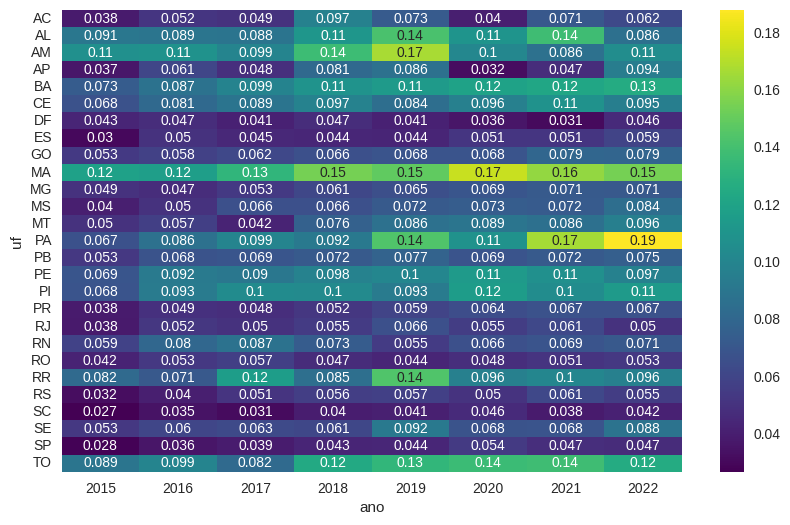

In [134]:
f, a = plt.subplots(figsize=(10,6))

sns.heatmap(to_heatmap, cmap='viridis', annot=True, ax= a);

In [27]:
df_final.groupby(['periodo', 'tipo_acidente'])['count'].sum().reset_index()

,periodo,tipo_acidente,count
0,madrugada,atropelamento de animal,13026
1,madrugada,atropelamento de pessoa,6844
2,madrugada,capotamento,16460
3,madrugada,colisão com bicicleta,986
4,madrugada,colisão com objeto,2269
...,...,...,...
79,tarde,incêndio,4187
80,tarde,queda de motocicleta / bicicleta / veículo,15883
81,tarde,queda de ocupante de veículo,5563
82,tarde,saída de pista,96825


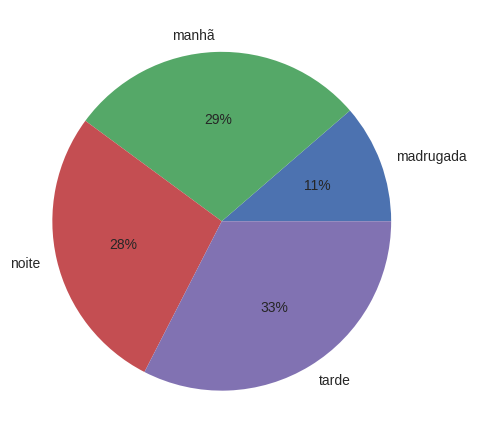

In [28]:
df_final.groupby(['periodo'])['count'].sum().reset_index()

plt.pie(df_final.groupby(['periodo'])['count'].sum().reset_index()['count'], 
        labels = df_final.groupby(['periodo'])['count'].sum().reset_index()['periodo'], autopct='%.0f%%')
plt.show()

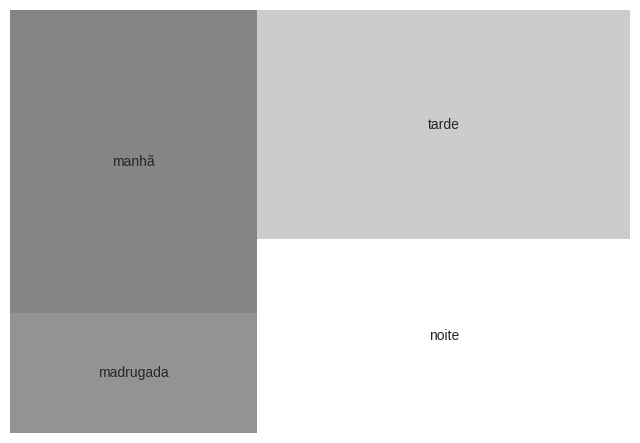

In [29]:
squarify.plot(sizes=df_final.groupby(['periodo'])['count'].sum().reset_index()['count'], 
              label=df_final.groupby(['periodo'])['count'].sum().reset_index()['periodo'], alpha=.8 )
plt.axis('off')
plt.show()

In [30]:
periodo_count = df_final.groupby(['periodo'])['count'].sum().reset_index()
periodo_count

,periodo,count
0,madrugada,224604
1,manhã,565876
2,noite,546108
3,tarde,644729


In [31]:
periodo_count.loc[periodo_count['periodo'] == 'madrugada']['count'].values[0]

224604

In [32]:
def merge_values(df, percent_to_merge, column):

    values_of_merged = df.loc[df['percent'] <= percent_to_merge]['count'].sum()

    df = df.loc[df['percent'] > percent_to_merge].reset_index(drop=True)
    
    df.loc[len(df.index)] = [column, 'Outros', values_of_merged, 0]

    return df.copy()
    

In [33]:
periodo_tipo_count = df_final.groupby(['periodo', 'tipo_acidente'])['count'].sum().reset_index()
periodo_tipo_count = periodo_tipo_count.sort_values(by=['periodo', 'count'])

madrugada_tipo_count = periodo_tipo_count.loc[periodo_tipo_count['periodo'] == 'madrugada'].reset_index(drop=True)
madrugada_tipo_count['percent'] = madrugada_tipo_count['count'] / periodo_count.loc[periodo_count['periodo'] == 'madrugada']['count'].values[0]
madrugada_tipo_count = merge_values(madrugada_tipo_count, 0.06, 'madrugada')

In [34]:
manha_tipo_count = periodo_tipo_count.loc[periodo_tipo_count['periodo'] == 'manhã'].reset_index(drop=True)
manha_tipo_count['percent'] = manha_tipo_count['count'] / periodo_count.loc[periodo_count['periodo'] == 'manhã']['count'].values[0]
manha_tipo_count = merge_values(manha_tipo_count, 0.06, 'manhã')

In [35]:
tarde_tipo_count = periodo_tipo_count.loc[periodo_tipo_count['periodo'] == 'tarde'].reset_index(drop=True)
tarde_tipo_count['percent'] = tarde_tipo_count['count'] / periodo_count.loc[periodo_count['periodo'] == 'tarde']['count'].values[0]
tarde_tipo_count = merge_values(tarde_tipo_count, 0.06, 'tarde')

In [36]:
noite_tipo_count = periodo_tipo_count.loc[periodo_tipo_count['periodo'] == 'noite'].reset_index(drop=True)
noite_tipo_count['percent'] = noite_tipo_count['count'] / periodo_count.loc[periodo_count['periodo'] == 'noite']['count'].values[0]
noite_tipo_count = merge_values(noite_tipo_count, 0.06, 'noite')

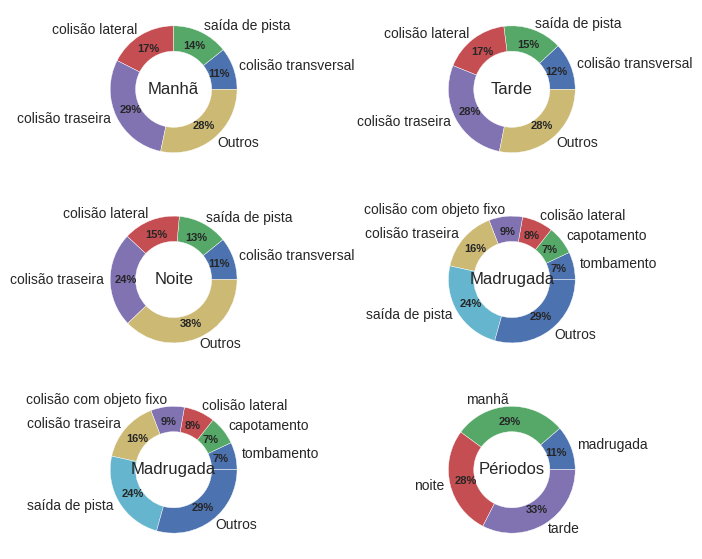

In [63]:
fig, axm = plt.subplot_mosaic([['A1','A2'],
                               ['B1','B2'],
                               ['C1','C2']], figsize=(8, 7))

def create_donut_chart(ax, data, labels, autopct='%.0f%%'):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct=autopct,
                                      wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.75)
    for text in texts:
        text.set(size=10)
    for autotext in autotexts:
        autotext.set(size=8, weight="bold")

def add_center_label(ax, label):
    ax.annotate(label, xy=(0, 0), fontsize=12, ha='center', va='center')

create_donut_chart(axm['A1'], manha_tipo_count['count'], manha_tipo_count['tipo_acidente'])
create_donut_chart(axm['A2'], tarde_tipo_count['count'], tarde_tipo_count['tipo_acidente'])
create_donut_chart(axm['B1'], noite_tipo_count['count'], noite_tipo_count['tipo_acidente'])
create_donut_chart(axm['B2'], madrugada_tipo_count['count'], madrugada_tipo_count['tipo_acidente'])
create_donut_chart(axm['C1'], madrugada_tipo_count['count'], madrugada_tipo_count['tipo_acidente'])
create_donut_chart(axm['C2'], df_final.groupby(['periodo'])['count'].sum().reset_index()['count'],
                   df_final.groupby(['periodo'])['count'].sum().reset_index()['periodo'])

add_center_label(axm['A1'], 'Manhã')
add_center_label(axm['A2'], 'Tarde')
add_center_label(axm['B1'], 'Noite')
add_center_label(axm['B2'], 'Madrugada')
add_center_label(axm['C1'], 'Madrugada')
add_center_label(axm['C2'], 'Périodos')

In [42]:
df_final.loc[df_final['mortos'] > 0].groupby(['uf'])['count'].sum().reset_index()['count']

0         3
1       292
2      1607
3       220
4       180
5      8108
6      2835
7       704
8      2786
9      4919
10     3423
11    12535
12     2132
13     3079
14     2306
15     2240
16     5171
17     2459
18     8029
19     5842
20     2049
21     1406
22      410
23     5155
24     6425
25      972
26     4447
27     1258
Name: count, dtype: int64

In [43]:
loli_pop = df_final.groupby(['uf'])['count'].sum().reset_index()
loli_pop['percentagem_mortos'] =  df_final.loc[df_final['mortos'] > 0].groupby(['uf'])['count'].sum().reset_index()['count'] / loli_pop['count']
loli_pop

,uf,count,percentagem_mortos
0,(null),12,0.250000
1,AC,5811,0.050250
2,AL,22087,0.072758
3,AM,2673,0.082305
4,AP,3052,0.058978
5,BA,108473,0.074747
6,CE,41910,0.067645
7,DF,18703,0.037641
8,ES,82716,0.033682
9,GO,89938,0.054693


In [44]:
my_range=range(1,len(loli_pop.index)+1)

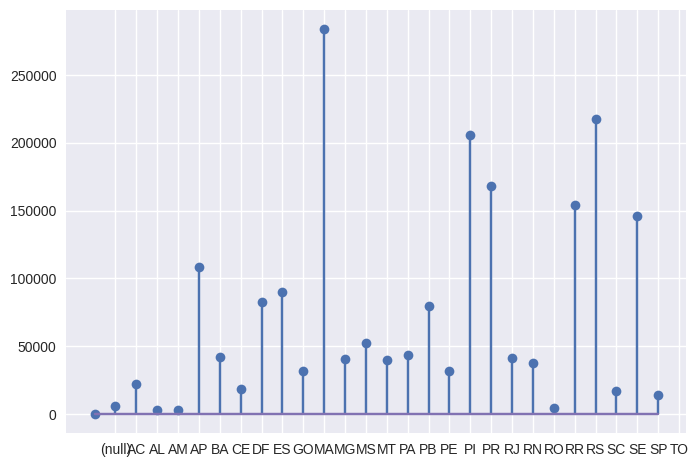

In [45]:
plt.stem(loli_pop['count'])
plt.xticks( my_range, loli_pop['uf'])
plt.show()

In [46]:

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

book_colors = {
    'my_blue':'#1e83af',
    'my_red': '#9c1416',
    'my_green': '#1a7512',
    'cinza': '#ABA7A8',
    'rosa_escuro': '#CC527A',
    'rosa': '#E8175D',
    'preto_claro': '#474747',
    'preto': '#363636',
}

font = {
    'family': 'serif',
    'color':  book_colors['preto'],
    'weight': 'normal',
    'size': 16,
}

/tmp/ipykernel_39265/836813060.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1200x800 with 0 Axes>

In [47]:
df_final.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007,127675
1,2008,141043
2,2009,158646
3,2010,183469
4,2011,192326
5,2012,184568
6,2013,186748
7,2014,169201
8,2015,122161
9,2016,96363


In [ ]:
# grafico_simples(df_pessoas, 'ano', 'pessoas', 
#                 'Quantidade de pessoas que sofreram acidente na PB entre 2007 e 2020')

In [ ]:
def split_time(time):
    
    time_int = int(''.join(time.split(':')[:2]))
    
    if 0 < time_int < 600:
        return '00-06'
    elif 600 < time_int < 800:
        return '06-08'
    elif 800 < time_int < 1200:
        return '08-12'
    elif 1200 < time_int < 1600:
        return '12-16'
    elif 1600 < time_int < 2000:
        return '16-20'
    elif 2000 < time_int < 2400:
        return '20-24'


In [ ]:
df_sem_duplicatas_PB['time_split'] = df_sem_duplicatas_PB['horario'].apply(lambda time: split_time(time), 1)

In [ ]:
df_sem_duplicatas_PB['time_split'].value_counts()

In [64]:
import geopandas as gpd

In [65]:
INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

In [66]:
INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [164]:
df_final_plot_geo = df_final.rename(columns={"uf": "sigla"})

In [165]:
df_final_plot_geo = df_final_plot_geo.loc[((df_final_plot_geo['ano_int'] >= 2010) &
                                                 (df_final_plot_geo['ano_int'] < 2021))].reset_index(drop=True)
df_final_plot_geo

,id,data_inversa,dia_semana,horario,sigla,br,km,municipio,causa_acidente,tipo_acidente,...,veiculos,latitude,longitude,regional,delegacia,uop,ano,count,periodo,ano_int
0,17.0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,colisão traseira,...,2,"-28,5071196","-50,941176",SPRF-RS,DEL05-RS,UOP03-DEL05-RS,2017,1,madrugada,2017
1,20.0,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,saída de pista,...,2,"-25,754","-49,1266",SPRF-PR,DEL01-PR,DEL7/1-UOP08/PR,2017,1,madrugada,2017
2,69.0,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,colisão frontal,...,2,"-11,9618","-38,0953",SPRF-BA,DEL01-BA,UOP04-DEL01-BA,2017,1,madrugada,2017
3,106.0,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,colisão lateral,...,3,"-1,2899799","-47,83483207",SPRF-PA,DEL01-PA,DEL19/1-UOP02/PA,2017,1,manhã,2017
4,109.0,2017-01-01,domingo,09:00:00,GO,20.0,"220,5",POSSE,Defeito na Via,colisão com objeto estático,...,1,"-14,14220931","-46,32258922",SPRF-DF,DEL02-DF,UOP02-DEL02-DF,2017,1,manhã,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424862,83448027.0,2014-06-21,Sábado,14:10:00,PA,10,173.5,PARAGOMINAS,Desobediência à sinalização,tombamento,...,1,NaN,NaN,NaN,NaN,NaN,2014,1,tarde,2014
1424863,83448065.0,2014-07-22,Terça,16:47:00,RJ,101,313.0,SAO GONCALO,Outras,colisão lateral,...,2,NaN,NaN,NaN,NaN,NaN,2014,1,tarde,2014
1424864,83448466.0,2014-06-09,Segunda,06:30:00,SC,101,198.0,BIGUACU,Não guardar distância de segurança,colisão traseira,...,2,NaN,NaN,NaN,NaN,NaN,2014,1,manhã,2014
1424865,83449988.0,2014-11-23,Domingo,06:30:00,RS,386,446.0,CANOAS,Outras,atropelamento de pessoa,...,1,NaN,NaN,NaN,NaN,NaN,2014,1,manhã,2014


In [166]:
df_final_plot_geo = (df_final_plot_geo.groupby(['sigla'])['mortos'].sum()  / df_final_plot_geo.groupby(['sigla'])['pessoas'].sum()).reset_index()
df_final_plot_geo.columns = ['sigla', 'taxa']
df_final_plot_geo

,sigla,taxa
0,(null),0.250000
1,AC,0.022666
2,AL,0.038824
3,AM,0.036680
4,AP,0.024915
5,BA,0.040019
6,CE,0.033565
7,DF,0.016867
8,ES,0.019086
9,GO,0.030226


In [128]:
# df_final_plot_geo['qtt_mortes_porcent'] = df_final_plot_geo['mortos'] / df_final_plot_geo['pessoas']

In [129]:
# df_final_plot_geo[['mortos', 'pessoas', 'qtt_mortes_porcent']]['qtt_mortes_porcent']

0       1.000000
1       0.500000
2       0.333333
3       0.500000
4       0.500000
          ...   
4520    1.000000
4521    0.285714
4522    0.166667
4523    0.500000
4524    0.500000
Name: qtt_mortes_porcent, Length: 4525, dtype: float64

In [130]:
# df_plot_geo_mortes_percent = df_final_plot_geo.groupby(['sigla'])['qtt_mortes_porcent'].mean().reset_index()

In [131]:
# df_plot_geo_mortes_percent

,sigla,qtt_mortes_porcent
0,AC,0.468519
1,AL,0.553140
2,AM,0.464286
3,AP,0.333333
4,BA,0.506685
5,CE,0.531567
6,DF,0.474529
7,ES,0.485476
8,GO,0.492265
9,MA,0.499675


In [146]:
df_final_plot_geo

,sigla,0
0,AC,0.019697
1,AL,0.055820
2,AM,0.040609
3,AP,0.012531
4,BA,0.059922
5,CE,0.048392
6,DF,0.015886
7,ES,0.025137
8,GO,0.034797
9,MA,0.084254


In [167]:
df_geo_merged = INFOS_UFS.merge(df_final_plot_geo, 
                                           on='sigla', 
                                           how='left')

In [168]:
df_geo_merged

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,taxa
0,Goiás,NaN,Sim,GO,52,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",0.030226
1,Mato Grosso do Sul,NaN,Sim,MS,50,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",0.027951
2,Paraná,NaN,Sim,PR,41,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",0.020688
3,Minas Gerais,NaN,Sim,MG,31,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",0.026156
4,Sergipe,NaN,Sim,SE,28,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",0.029243
5,Alagoas,NaN,Sim,AL,27,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",0.038824
6,Tocantins,NaN,Sim,TO,17,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",0.046299
7,Roraima,NaN,Sim,RR,14,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",0.042171
8,Amazonas,NaN,Sim,AM,13,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",0.036680
9,Acre,NaN,Sim,AC,12,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",0.022666


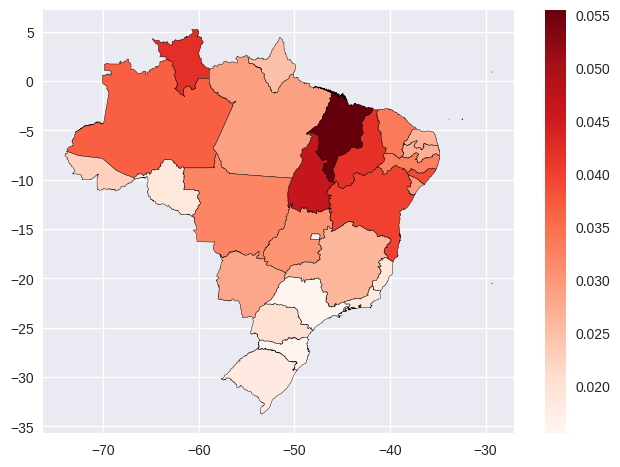

In [169]:
df_geo_merged.plot(column='taxa',
                             cmap='Reds',
                             legend=True,
                             edgecolor='black');

In [ ]:
df_sem_duplicatas.values[50]

In [ ]:
import cartopy.crs as ccrs
import matplotlib

In [ ]:
ax2 = plt.subplot()  #"EPSG:3395"

# usa_main is a geoDataFrame with crs="EPSG:3395"
df_sem_duplicatas_merged.loc[df_sem_duplicatas_merged['sigla'] == 'PB'].plot(column="pessoas", legend=False, 
              cmap=matplotlib.cm.Reds,
              ax=ax2)


circles = []

for example in df_sem_duplicatas.loc[df_sem_duplicatas['sigla'] == 'PB', ['latitude', 'longitude']].values:
    circles.append(plt.Circle((float(str(example[1]).replace(',', '.')), float(str(example[0]).replace(',', '.')) ), 0.02 ))
    
# Add the circles to the axis

#ax2.set_aspect( 1 )
for circle in circles:
    ax2.add_patch(circle)


In [ ]:
df_sem_duplicatas_merged['geometry']

In [ ]:
df_sem_duplicatas_merged.columns

In [ ]:
# # Import all roads NL
# map_df = gpd.read_file('roads.shp')
# # Show data format
# map_df.head()

# # Set image properties
# fig, ax = plt.subplots(1, figsize=(10,14))
# map_df.plot(cmap='Wistia', ax=ax)
# ax.axis('off')

# # Set coordinates to match Utrecht, change for your own city
# ax.set_xlim(5.1050, 5.1400)
# ax.set_ylim(52.0620, 52.1115)
# ax.set_aspect('equal')

# # Plot the street map of Utrecht
# plt.show()